### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [46]:
from sklearn import linear_model, datasets
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import time as time
from sklearn.metrics import classification_report


In [68]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

k = len(set(y)) # number of class
m = X_train.shape[0] # number of data
n = X_train.shape[1] # feature
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train == each_class
    Y_train_encoded[np.where(cond), each_class] = 1

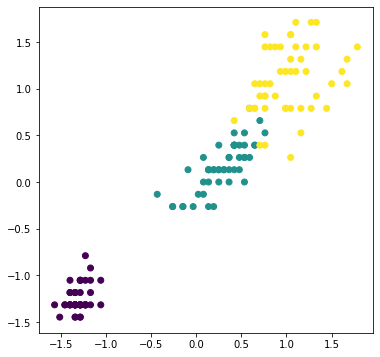

In [48]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [62]:
class LogisticRegression:
    
    def __init__(self, method = "batch", alpha = 0.0001, max_iter = 20000, batch_size = 100) -> None:
        self.method = method
        self.alpha = alpha
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.costs = []
        self.sto_used_index = []

    def softmax(self, yhat):
        return np.exp(yhat) / np.sum(np.exp(yhat), axis = 1, keepdims = True)

    def softmax_grad(self, X, error):
        return np.dot(X.T, error)

    def h_theta(self, X, W):
        return self.softmax(np.dot(X, W))

    def gradient(self, X, Y, W):
        m = X.shape[0]
        h = self.h_theta(X, W)
        cost = - np.sum(Y * np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return cost, grad

    def get_train_data_by_method(self, X, Y, method):
        if method == "batch":
            X_train = X
            Y_train = Y
        elif method == "minibatch":
            index = np.random.randint(X.shape[0])
            while index in self.sto_used_index:
                index = np.random.randint(X.shape[0])
            X_train = X[index:index + self.batch_size, :]
            Y_train = Y[index:index + self.batch_size, :]
            self.sto_used_index.append(index)
            if len(self.sto_used_index) == X.shape[0]:
                self.sto_used_index = []
        elif method == "sto":
            index = np.random.randint(X.shape[0])
            while index in self.sto_used_index:
                index = np.random.randint(X.shape[0])
            X_train = X[index, :].reshape(1, -1)
            Y_train = Y[index, :]
            self.sto_used_index.append(index)
            if len(self.sto_used_index) == X.shape[0]:
                self.sto_used_index = []
        else:
            raise ValueError
        return X_train, Y_train

    def fit(self, X, Y):
        start_time = time.time()
        self.W = np.random.rand(X.shape[1], Y.shape[1])

        for i in range(self.max_iter):
            X_train, Y_train = self.get_train_data_by_method(X, Y, self.method)
            cost, grad = self.gradient(X_train, Y_train, self.W)
            self.costs.append(cost)
            self.W = self.W - self.alpha * grad

        training_time = time.time() - start_time
        return training_time

    def predict(self, X):
        return np.argmax(self.h_theta(X, self.W), axis=1)

    def plot_cost(self):
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost per iteration')
    

Training Method: Batch
Training time: 0.8884687423706055
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



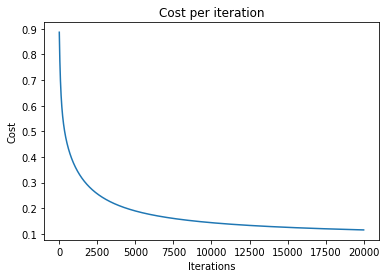

In [63]:
print("Training Method: Batch")
model = LogisticRegression(method="batch")
training_time = model.fit(X_train, Y_train_encoded)
print(f"Training time: {training_time}")
y_predict = model.predict(X_test)
print("=========Classification report=======")
print("Report: ", classification_report(y_test, y_predict))
model.plot_cost()

Training Method: Mini-Batch
Training time: 2.0610170364379883
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



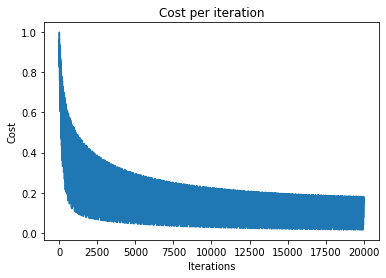

In [64]:
print("Training Method: Mini-Batch")
model = LogisticRegression(method="minibatch")
training_time = model.fit(X_train, Y_train_encoded)
print(f"Training time: {training_time}")
y_predict = model.predict(X_test)
print("=========Classification report=======")
print("Report: ", classification_report(y_test, y_predict))
model.plot_cost()

Training Method: Stochastic
Training time: 1.948293685913086
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       0.00      0.00      0.00        15
           2       0.54      1.00      0.70        14

    accuracy                           0.67        45
   macro avg       0.46      0.67      0.54        45
weighted avg       0.47      0.67      0.54        45



/home/maxpasit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


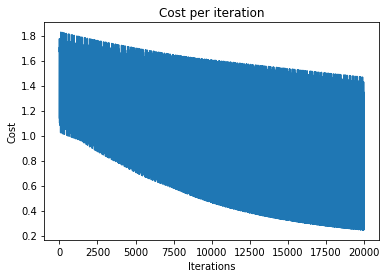

In [70]:
print("Training Method: Stochastic")
model = LogisticRegression(method="sto")
training_time = model.fit(X_train, Y_train_encoded)
print(f"Training time: {training_time}")
y_predict = model.predict(X_test)
print("=========Classification report=======")
print("Report: ", classification_report(y_test, y_predict))
model.plot_cost()

Summary

For the training time compare to each method. The fastest one is Batch method and for the slowest is Mini-Batch method. By hypothesis, the fastest one should be Stochastic followed by Mini-Bath and the slowest one should be Batch. In my opnion the reason for this is we don't have a lot of data sets and array slicing in Mini-batch also waste the training time.

The method that have the best accuracy are Batch and Mini batch and the most inaccurate is Stochastic. I think the data is simple to classify so Mini batch and Batch method have same accuracy, if training is more complex it should have some different in accuracy.

The Cost per iteration graph show that Batch method have minimal lost and not fluctuate compare to Mini Batch method.